In [2]:
import AMCParser.amc_parser as amc

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation
from scipy.spatial.transform import Rotation as R

In [3]:
%matplotlib inline

In [5]:
cmu_meta = pd.read_csv('Dataset/cmu_meta.csv')

In [6]:
cmu_meta

path  Subject  Activity  \
0       CMU_Mocap/all_asfamc/subjects/22/22_21.amc       22        21   
1       CMU_Mocap/all_asfamc/subjects/22/22_09.amc       22         9   
2       CMU_Mocap/all_asfamc/subjects/22/22_08.amc       22         8   
3       CMU_Mocap/all_asfamc/subjects/22/22_20.amc       22        20   
4       CMU_Mocap/all_asfamc/subjects/22/22_22.amc       22        22   
...                                            ...      ...       ...   
2396  CMU_Mocap/all_asfamc/subjects/113/113_08.amc      113         8   
2397  CMU_Mocap/all_asfamc/subjects/113/113_21.amc      113        21   
2398  CMU_Mocap/all_asfamc/subjects/113/113_18.amc      113        18   
2399  CMU_Mocap/all_asfamc/subjects/113/113_26.amc      113        26   
2400    CMU_Mocap/all_asfamc/subjects/25/25_01.amc       25         1   

                                       asf_path full_id  \
0       CMU_Mocap/all_asfamc/subjects/22/22.asf   22_21   
1       CMU_Mocap/all_asfamc/subjects/22/22.asf   22_09   
2       CMU_Mocap/all_asfamc/subjects/22/22.asf   22_08   
3       CMU_Mocap/all_asfamc/subjects/22/22.asf   22_20   
4       CMU_Mocap/all_asfamc/subjects/22/22.asf   22_22   
...                                         ...     ...   
2396  CMU_Mocap/all_asfamc/subjects/113/113.asf  113_08   
2397  CMU_Mocap/all_asfamc/subjects/113/113.asf  113_21   
2398  CMU_Mocap/all_asfamc/subjects/113/113.asf  113_18   
2399  CMU_Mocap/all_asfamc/subjects/113/113.asf  113_26   
2400    CMU_Mocap/all_asfamc/subjects/25/25.asf   25_01   

                                   activity_description  \
0     conversation - B pounds high stool, points at ...   
1     A gives B a shoulder rub; B sits, A stands (2 ...   
2     hold hands, swing arms, walk (2 subjects - sub...   
3     violence - A picks up high stool, threatens to...   
4     walk; B catches keys thrown by A (2 subjects -...   
...                                                 ...   
2396                                Lay down and get up   
2397                                     Standing Still   
2398                                      Walk sideways   
2399                                     Walk and carry   
2400           nursery rhyme - "I'm a little teapot..."   

                                                    url  walking_like  
0      http://mocap.cs.cmu.edu:80/subjects/22/22_21.amc         False  
1      http://mocap.cs.cmu.edu:80/subjects/22/22_09.amc         False  
2      http://mocap.cs.cmu.edu:80/subjects/22/22_08.amc          True  
3      http://mocap.cs.cmu.edu:80/subjects/22/22_20.amc         False  
4      http://mocap.cs.cmu.edu:80/subjects/22/22_22.amc          True  
...                                                 ...           ...  
2396  http://mocap.cs.cmu.edu:80/subjects/113/113_08...         False  
2397  http://mocap.cs.cmu.edu:80/subjects/113/113_21...         False  
2398  http://mocap.cs.cmu.edu:80/subjects/113/113_18...          True  
2399  http://mocap.cs.cmu.edu:80/subjects/113/113_26...          True  
2400   http://mocap.cs.cmu.edu:80/subjects/25/25_01.amc         False  

[2401 rows x 8 columns]

In [7]:
walking_list = cmu_meta[cmu_meta.walking_like == True][cmu_meta.Subject == 9].values.tolist()

In [8]:
for i, w in enumerate(walking_list):
    print(i, w[0], w[5])

0 CMU_Mocap/all_asfamc/subjects/09/09_04.amc run
1 CMU_Mocap/all_asfamc/subjects/09/09_10.amc run
2 CMU_Mocap/all_asfamc/subjects/09/09_01.amc run
3 CMU_Mocap/all_asfamc/subjects/09/09_06.amc run
4 CMU_Mocap/all_asfamc/subjects/09/09_07.amc run
5 CMU_Mocap/all_asfamc/subjects/09/09_03.amc run
6 CMU_Mocap/all_asfamc/subjects/09/09_02.amc run
7 CMU_Mocap/all_asfamc/subjects/09/09_05.amc run
8 CMU_Mocap/all_asfamc/subjects/09/09_11.amc run
9 CMU_Mocap/all_asfamc/subjects/09/09_09.amc run
10 CMU_Mocap/all_asfamc/subjects/09/09_08.amc run
11 CMU_Mocap/all_asfamc/subjects/09/09_12.amc navigate - walk forward, backward, sideways


In [9]:
walking_list[2]

['CMU_Mocap/all_asfamc/subjects/09/09_01.amc',
 9,
 1,
 'CMU_Mocap/all_asfamc/subjects/09/09.asf',
 '09_01',
 'run',
 'http://mocap.cs.cmu.edu:80/subjects/09/09_01.amc',
 True]

In [10]:
idx = 2
joints = amc.parse_asf('Dataset/' + walking_list[idx][3])
motions = amc.parse_amc('Dataset/' + walking_list[idx][0])

In [11]:
frame_idx = np.random.choice(range(len(motions)))

In [12]:
frame_idx

96

In [13]:
joints['root'].set_motion(motions[16])

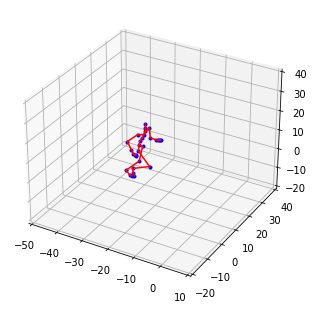

In [14]:
joints['root'].draw()

In [15]:
print(joints['lfemur'].pretty_print())
print()
joints['lfemur'].children[0].pretty_print()

joint: lfemur
direction:
[[ 0.34202 ]
 [-0.939693]
 [ 0.      ]]
limits: [[-160.   20.]
 [ -70.   70.]
 [ -60.   70.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df5160>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9df50a0>]
None

joint: ltibia
direction:
[[ 0.34202 ]
 [-0.939693]
 [ 0.      ]]
limits: [[-10. 170.]
 [  0.   0.]
 [  0.   0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df54c0>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9df59d0>]


In [16]:
print(joints['lfemur'].coordinate)

[[  0.65746894]
 [  8.45930798]
 [-20.71832888]]


In [17]:
joints['lhipjoint'].limits

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [18]:
joints

{'root': <AMCParser.amc_parser.Joint at 0x7f98c9df50d0>,
 'lhipjoint': <AMCParser.amc_parser.Joint at 0x7f98c9df5160>,
 'lfemur': <AMCParser.amc_parser.Joint at 0x7f98c9df54c0>,
 'ltibia': <AMCParser.amc_parser.Joint at 0x7f98c9df50a0>,
 'lfoot': <AMCParser.amc_parser.Joint at 0x7f98c9df59d0>,
 'ltoes': <AMCParser.amc_parser.Joint at 0x7f98c9df5520>,
 'rhipjoint': <AMCParser.amc_parser.Joint at 0x7f98c9df5130>,
 'rfemur': <AMCParser.amc_parser.Joint at 0x7f98c9df5580>,
 'rtibia': <AMCParser.amc_parser.Joint at 0x7f98c9df55b0>,
 'rfoot': <AMCParser.amc_parser.Joint at 0x7f98c9df5670>,
 'rtoes': <AMCParser.amc_parser.Joint at 0x7f98c9df55e0>,
 'lowerback': <AMCParser.amc_parser.Joint at 0x7f98c9df5f40>,
 'upperback': <AMCParser.amc_parser.Joint at 0x7f98c9df5850>,
 'thorax': <AMCParser.amc_parser.Joint at 0x7f990cdfe610>,
 'lowerneck': <AMCParser.amc_parser.Joint at 0x7f990cdfe3d0>,
 'upperneck': <AMCParser.amc_parser.Joint at 0x7f990cdfe940>,
 'head': <AMCParser.amc_parser.Joint at 0x7f

root


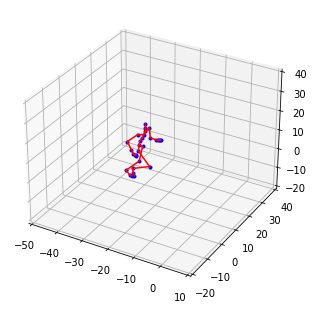

joint: root
direction:
[[0.]
 [0.]
 [0.]]
limits: [[0. 0.]
 [0. 0.]
 [0. 0.]]
parent: None
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9df5160>, <AMCParser.amc_parser.Joint object at 0x7f98c9df5130>, <AMCParser.amc_parser.Joint object at 0x7f98c9df5f40>]
None
[[ -0.34923]
 [ 17.7521 ]
 [-20.146  ]]



lhipjoint


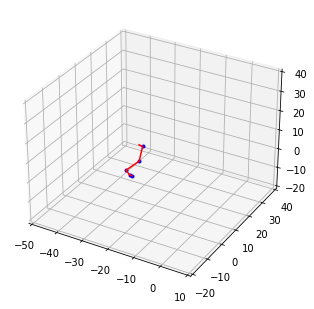

joint: lhipjoint
direction:
[[ 0.625129]
 [-0.738222]
 [ 0.253461]]
limits: [[0. 0.]
 [0. 0.]
 [0. 0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df50d0>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9df54c0>]
None
[[  1.33004611]
 [ 15.91355667]
 [-19.78190474]]



lfemur


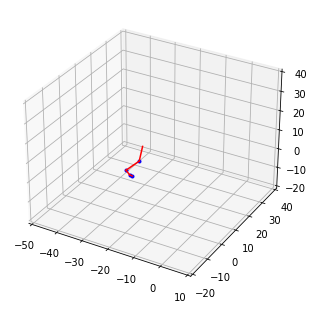

joint: lfemur
direction:
[[ 0.34202 ]
 [-0.939693]
 [ 0.      ]]
limits: [[-160.   20.]
 [ -70.   70.]
 [ -60.   70.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df5160>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9df50a0>]
None
[[  0.65746894]
 [  8.45930798]
 [-20.71832888]]



ltibia


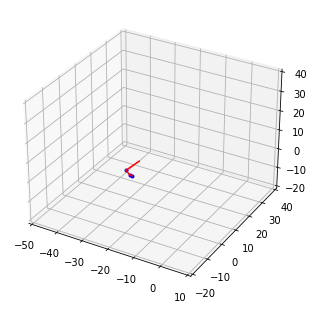

joint: ltibia
direction:
[[ 0.34202 ]
 [-0.939693]
 [ 0.      ]]
limits: [[-10. 170.]
 [  0.   0.]
 [  0.   0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df54c0>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9df59d0>]
None
[[ -0.09787782]
 [  2.39870957]
 [-25.43807869]]



lfoot


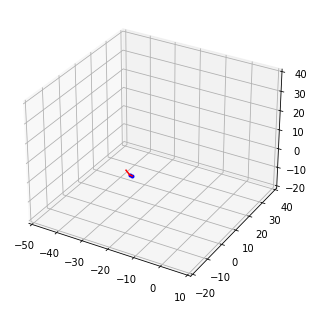

joint: lfoot
direction:
[[ 0.0772037]
 [-0.212115 ]
 [ 0.97419  ]]
limits: [[-45.  90.]
 [  0.   0.]
 [-70.  20.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df50a0>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9df5520>]
None
[[ -0.39526862]
 [  0.8790237 ]
 [-23.89754851]]



ltoes


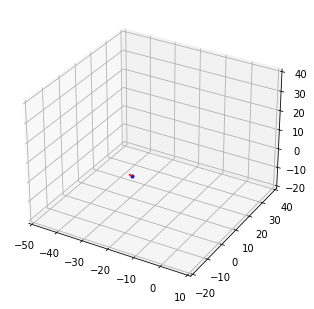

joint: ltoes
direction:
[[ 1.53513e-11]
 [-4.21834e-11]
 [ 1.00000e+00]]
limits: [[-90.  20.]
 [  0.   0.]
 [  0.   0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df59d0>
children: []
None
[[ -0.46651389]
 [  0.69606453]
 [-22.8180792 ]]



rhipjoint


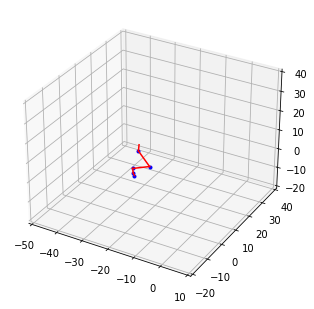

joint: rhipjoint
direction:
[[-0.621946]
 [-0.740623]
 [ 0.254285]]
limits: [[0. 0.]
 [0. 0.]
 [0. 0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df50d0>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9df5580>]
None
[[ -1.79201282]
 [ 15.78891543]
 [-19.54925506]]



rfemur


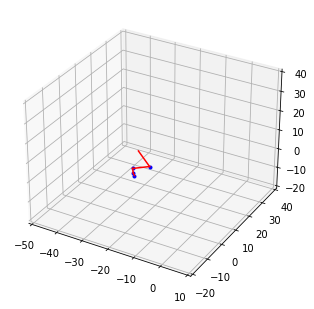

joint: rfemur
direction:
[[-0.34202 ]
 [-0.939693]
 [ 0.      ]]
limits: [[-160.   20.]
 [ -70.   70.]
 [ -70.   60.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df5130>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9df55b0>]
None
[[ -2.20522998]
 [  9.88283591]
 [-15.05405637]]



rtibia


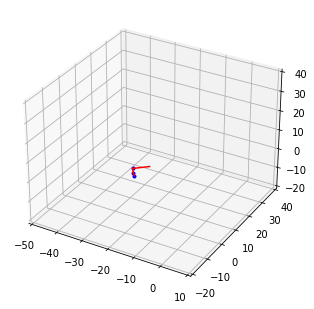

joint: rtibia
direction:
[[-0.34202 ]
 [-0.939693]
 [ 0.      ]]
limits: [[-10. 170.]
 [  0.   0.]
 [  0.   0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df5580>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9df5670>]
None
[[ -1.90479684]
 [  6.00738449]
 [-21.78328467]]



rfoot


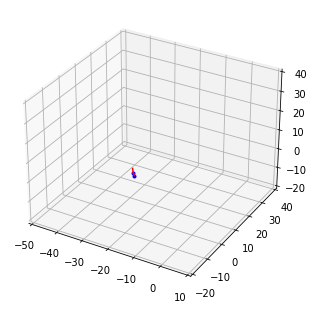

joint: rfoot
direction:
[[-0.082694]
 [-0.2272  ]
 [ 0.970331]]
limits: [[-45.  90.]
 [  0.   0.]
 [-20.  70.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df55b0>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9df55e0>]
None
[[ -2.01524358]
 [  3.80194608]
 [-21.47730535]]



rtoes


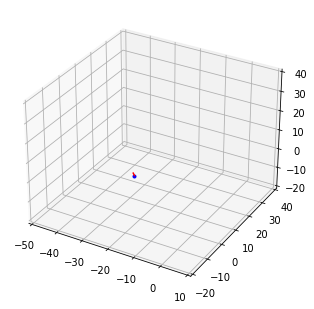

joint: rtoes
direction:
[[-1.53565e-11]
 [-4.21695e-11]
 [ 1.00000e+00]]
limits: [[-90.  20.]
 [  0.   0.]
 [  0.   0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df5670>
children: []
None
[[ -2.09004466]
 [  2.80779952]
 [-20.9717816 ]]



lowerback


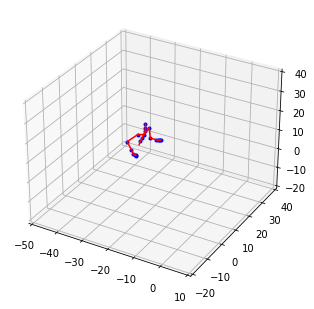

joint: lowerback
direction:
[[-6.95208e-04]
 [ 9.88391e-01]
 [-1.51929e-01]]
limits: [[-20.  45.]
 [-30.  30.]
 [-30.  30.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df50d0>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9df5850>]
None
[[ -0.23557915]
 [ 19.6564403 ]
 [-19.73847838]]



upperback


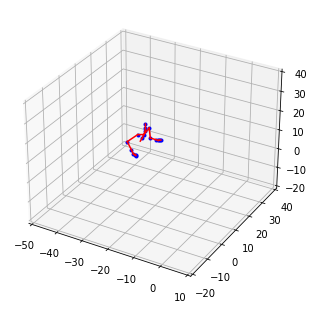

joint: upperback
direction:
[[-0.00268925]
 [ 0.999885  ]
 [-0.0149203 ]]
limits: [[-20.  45.]
 [-30.  30.]
 [-30.  30.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df5f40>
children: [<AMCParser.amc_parser.Joint object at 0x7f990cdfe610>]
None
[[ -0.113951  ]
 [ 21.48352296]
 [-19.03262837]]



thorax


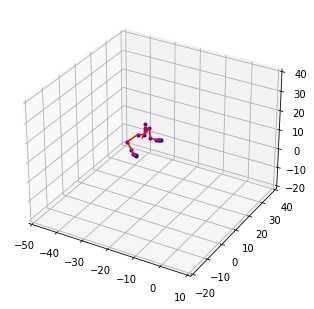

joint: thorax
direction:
[[-8.48408e-04]
 [ 9.98481e-01]
 [ 5.50912e-02]]
limits: [[-20.  45.]
 [-30.  30.]
 [-30.  30.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9df5850>
children: [<AMCParser.amc_parser.Joint object at 0x7f990cdfe3d0>, <AMCParser.amc_parser.Joint object at 0x7f990cdfe730>, <AMCParser.amc_parser.Joint object at 0x7f98c9d990a0>]
None
[[ -0.10094748]
 [ 23.40132432]
 [-18.43544806]]



lowerneck


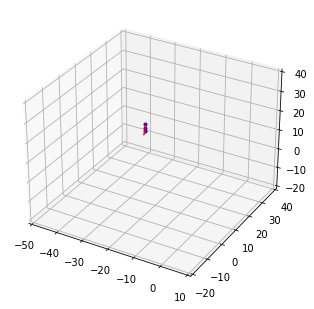

joint: lowerneck
direction:
[[-0.00577709]
 [ 0.998999  ]
 [ 0.0443608 ]]
limits: [[-20.  45.]
 [-30.  30.]
 [-30.  30.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f990cdfe610>
children: [<AMCParser.amc_parser.Joint object at 0x7f990cdfe940>]
None
[[ -0.0501816 ]
 [ 25.10052578]
 [-17.98894378]]



upperneck


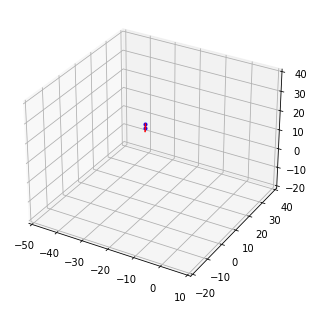

joint: upperneck
direction:
[[0.0320945]
 [0.999136 ]
 [0.0264105]]
limits: [[-20.  45.]
 [-30.  30.]
 [-30.  30.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f990cdfe3d0>
children: [<AMCParser.amc_parser.Joint object at 0x7f990cdfe400>]
None
[[  0.11707178]
 [ 26.81758768]
 [-17.93568762]]



head


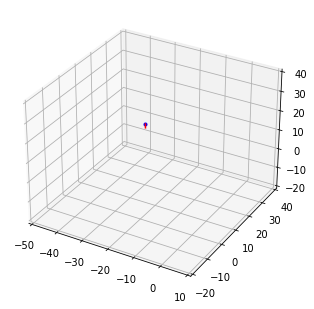

joint: head
direction:
[[0.0120552 ]
 [0.999916  ]
 [0.00480151]]
limits: [[-20.  45.]
 [-30.  30.]
 [-30.  30.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f990cdfe940>
children: []
None
[[  0.26377904]
 [ 28.60879089]
 [-18.03106762]]



lclavicle


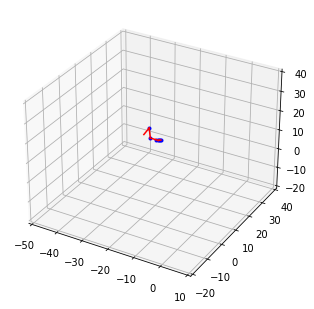

joint: lclavicle
direction:
[[ 0.909   ]
 [ 0.371533]
 [-0.188897]]
limits: [[  0.   0.]
 [-20.  10.]
 [  0.  20.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f990cdfe610>
children: [<AMCParser.amc_parser.Joint object at 0x7f990cdfe5e0>]
None
[[  3.14501604]
 [ 24.64686892]
 [-18.29517905]]



lhumerus


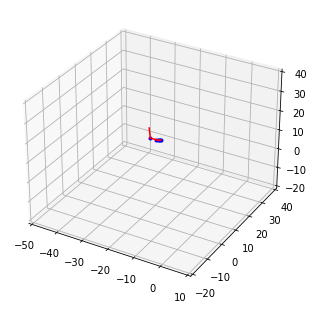

joint: lhumerus
direction:
[[ 1.00000e+00]
 [-4.48963e-11]
 [-6.48352e-28]]
limits: [[-60.  90.]
 [-90.  90.]
 [-90.  90.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f990cdfe730>
children: [<AMCParser.amc_parser.Joint object at 0x7f990cdfe4f0>]
None
[[  3.78461319]
 [ 19.16119691]
 [-18.24970366]]



lradius


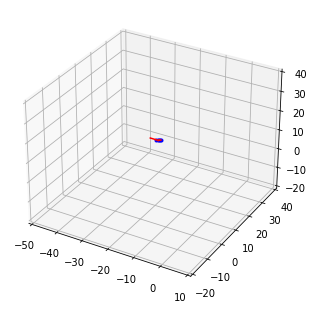

joint: lradius
direction:
[[ 1.00000e+00]
 [-4.48968e-11]
 [-4.78536e-27]]
limits: [[-10. 170.]
 [  0.   0.]
 [  0.   0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f990cdfe5e0>
children: [<AMCParser.amc_parser.Joint object at 0x7f990cdfe8e0>]
None
[[  2.23422249]
 [ 20.49824167]
 [-15.30464414]]



lwrist


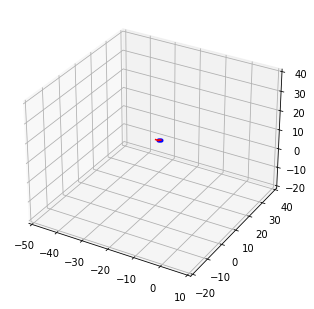

joint: lwrist
direction:
[[ 1.00000e+00]
 [-4.48942e-11]
 [-9.94350e-27]]
limits: [[   0.    0.]
 [-180.    0.]
 [   0.    0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f990cdfe4f0>
children: [<AMCParser.amc_parser.Joint object at 0x7f990cdfe2e0>, <AMCParser.amc_parser.Joint object at 0x7f98c9d99070>]
None
[[  1.4590293 ]
 [ 21.16676218]
 [-13.83211849]]



lhand


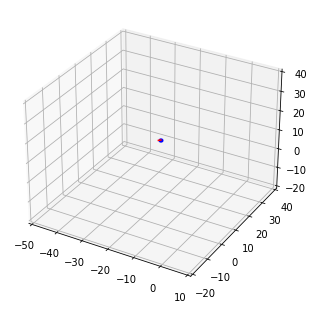

joint: lhand
direction:
[[ 1.0000e+00]
 [-4.4904e-11]
 [-1.9887e-26]]
limits: [[-90.  90.]
 [  0.   0.]
 [-45.  45.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f990cdfe8e0>
children: [<AMCParser.amc_parser.Joint object at 0x7f990cdfe7c0>]
None
[[  1.5901198 ]
 [ 21.37952431]
 [-13.35747611]]



lfingers


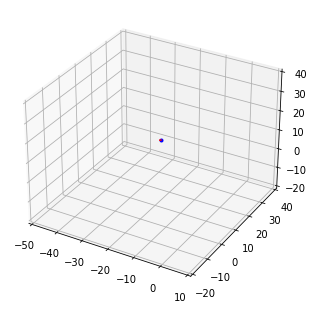

joint: lfingers
direction:
[[ 1.00000e+00]
 [-4.48893e-11]
 [-3.97740e-26]]
limits: [[ 0. 90.]
 [ 0.  0.]
 [ 0.  0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f990cdfe2e0>
children: []
None
[[  1.64334029]
 [ 21.54928699]
 [-12.96329639]]



lthumb


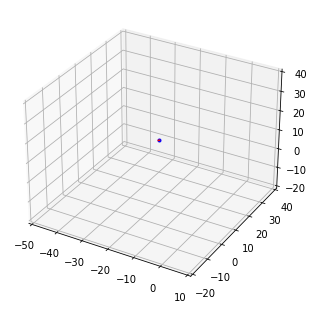

joint: lthumb
direction:
[[ 7.07107e-01]
 [-6.34934e-11]
 [ 7.07107e-01]]
limits: [[-45.  45.]
 [  0.   0.]
 [-45.  45.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f990cdfe8e0>
children: []
None
[[  1.31346141]
 [ 21.52500729]
 [-13.34627938]]



rclavicle


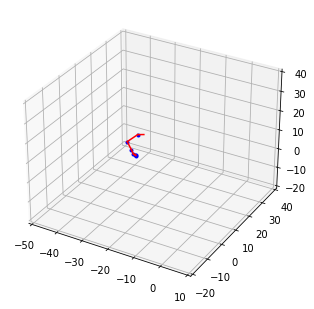

joint: rclavicle
direction:
[[-0.89595 ]
 [ 0.416672]
 [-0.153813]]
limits: [[  0.   0.]
 [-10.  20.]
 [-20.   0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f990cdfe610>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9d990d0>]
None
[[ -3.04483811]
 [ 25.07929963]
 [-19.03404949]]



rhumerus


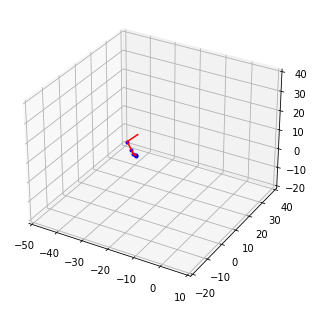

joint: rhumerus
direction:
[[-1.00000e+00]
 [-4.48952e-11]
 [ 5.57804e-28]]
limits: [[-90.  60.]
 [-90.  90.]
 [-90.  90.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9d990a0>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9d99100>]
None
[[ -3.64980322]
 [ 20.55201554]
 [-22.68569033]]



rradius


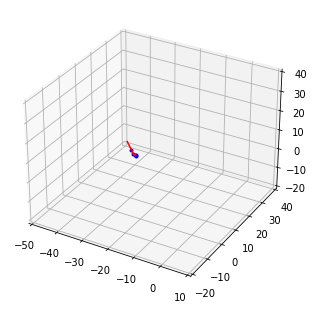

joint: rradius
direction:
[[-1.00000e+00]
 [-4.48967e-11]
 [-7.93646e-27]]
limits: [[-10. 170.]
 [  0.   0.]
 [  0.   0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9d990d0>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9d99130>]
None
[[ -4.29904744]
 [ 17.56725907]
 [-20.72965533]]



rwrist


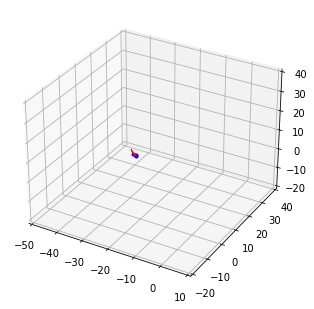

joint: rwrist
direction:
[[-1.00000e+00]
 [-4.49008e-11]
 [-9.94350e-27]]
limits: [[   0.    0.]
 [-180.    0.]
 [   0.    0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9d99100>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9d99160>, <AMCParser.amc_parser.Joint object at 0x7f98c9d991c0>]
None
[[ -4.62367045]
 [ 16.07487671]
 [-19.75163513]]



rhand


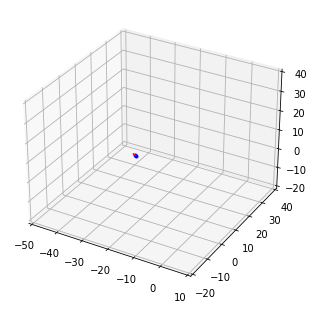

joint: rhand
direction:
[[-1.00000e+00]
 [-4.48812e-11]
 [-1.98870e-26]]
limits: [[-90.  90.]
 [  0.   0.]
 [-45.  45.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9d99130>
children: [<AMCParser.amc_parser.Joint object at 0x7f98c9d99190>]
None
[[ -4.85193311]
 [ 16.00305366]
 [-19.14673128]]



rfingers


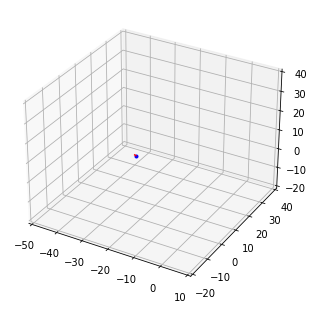

joint: rfingers
direction:
[[-1.00000e+00]
 [-4.49228e-11]
 [-3.97740e-26]]
limits: [[ 0. 90.]
 [ 0.  0.]
 [ 0.  0.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9d99160>
children: []
None
[[ -4.98766197]
 [ 15.90227757]
 [-18.65026044]]



rthumb


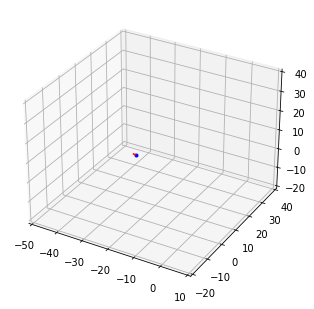

joint: rthumb
direction:
[[-7.07107e-01]
 [-6.34912e-11]
 [ 7.07107e-01]]
limits: [[-45.  45.]
 [  0.   0.]
 [-45.  45.]]
parent: <AMCParser.amc_parser.Joint object at 0x7f98c9d99130>
children: []
None
[[ -4.50084159]
 [ 15.93045611]
 [-19.02286509]]





In [19]:
for j in joints:
    print(j)
    joints[j].draw()
    print(joints[j].pretty_print())
    print(joints[j].coordinate)
    print('\n\n')

In [20]:
joints_data = []
for i in range(16, len(motions)):
    joints['root'].set_motion(motions[i])
    tmp = {}
    for j in joints:
        tmp[j] = joints[j].coordinate.ravel().tolist()
    joints_data.append(tmp)

In [21]:
joints_data[0]

{'root': [-0.34923, 17.7521, -20.146],
 'lhipjoint': [1.3300461110697188, 15.913556666479641, -19.78190474123562],
 'lfemur': [0.6574689413008734, 8.459307981563219, -20.718328875378997],
 'ltibia': [-0.09787781893926428, 2.398709574565631, -25.43807868757079],
 'lfoot': [-0.3952686188127524, 0.8790237023946958, -23.897548512538357],
 'ltoes': [-0.46651389046555775, 0.6960645322211829, -22.8180791958292],
 'rhipjoint': [-1.7920128189198268, 15.7889154262281, -19.54925506220523],
 'rfemur': [-2.205229977150889, 9.882835912803772, -15.054056365603824],
 'rtibia': [-1.9047968367869665, 6.0073844885971805, -21.78328467165666],
 'rfoot': [-2.015243579636619, 3.801946076735558, -21.477305354116226],
 'rtoes': [-2.0900446558000048, 2.80779952128767, -20.971781600672436],
 'lowerback': [-0.2355791544395473, 19.656440296162195, -19.738478379573156],
 'upperback': [-0.11395099826927733, 21.483522963193064, -19.032628371170446],
 'thorax': [-0.10094747839705873, 23.40132431647593, -18.43544806426

In [22]:
joints_showed = [
    'root', 
    'lhipjoint', 'lfemur', 'ltibia',
    'rhipjoint', 'rfemur', 'rtibia',
    ]
parent_map = {
    'lhipjoint': 'root',
    'lfemur': 'lhipjoint',
    'ltibia': 'lfemur',
    'rhipjoint': 'root',
    'rfemur': 'rhipjoint',
    'rtibia': 'rfemur'
}

In [23]:
def filter_joints_frame(joints_data, frame, joints_showed):
    xs = np.array([joints_data[frame][j][0] for j in joints_showed])
    ys = np.array([joints_data[frame][j][1] for j in joints_showed])
    zs = np.array([joints_data[frame][j][2] for j in joints_showed])
    return xs, ys, zs

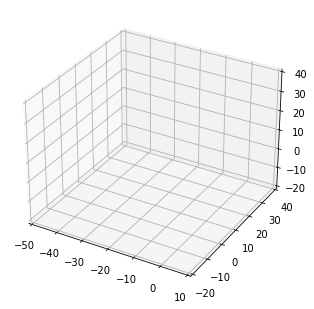

In [24]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlim3d(-50, 10)
ax.set_ylim3d(-20, 40)
ax.set_zlim3d(-20, 40)

l, = ax.plot([], [], [], 'b.')

def animate(frame):
    # xs, ys, zs = [], [], []
    # for j in joints_data[frame]:
    #     if(j in joints_showed):
    #         xs.append(joints_data[frame][j][0])
    #         ys.append(joints_data[frame][j][1])
    #         zs.append(joints_data[frame][j][2])
    xs, ys, zs = filter_joints_frame(joints_data, frame, joints_showed)
    # plt.plot(zs, xs, ys, 'b.')
    l.set_data(zs, xs)
    l.set_3d_properties(ys)
    
    # for j in joints_data[frame]:
    #     child = j
    #     if child in parent_map:
    #         parent = parent_map[child]
    #         if parent is not None:
    #             xs = [joints_data[frame][child][0, 0], joints_data[frame][parent][0, 0]]
    #             ys = [joints_data[frame][child][1, 0], joints_data[frame][parent][1, 0]]
    #             zs = [joints_data[frame][child][2, 0], joints_data[frame][parent][2, 0]]
    #             plt.plot(zs, xs, ys, 'r')


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(joints_data))

from IPython.display import HTML
HTML(ani.to_jshtml())

In [25]:
joints_data[0]

{'root': [-0.34923, 17.7521, -20.146],
 'lhipjoint': [1.3300461110697188, 15.913556666479641, -19.78190474123562],
 'lfemur': [0.6574689413008734, 8.459307981563219, -20.718328875378997],
 'ltibia': [-0.09787781893926428, 2.398709574565631, -25.43807868757079],
 'lfoot': [-0.3952686188127524, 0.8790237023946958, -23.897548512538357],
 'ltoes': [-0.46651389046555775, 0.6960645322211829, -22.8180791958292],
 'rhipjoint': [-1.7920128189198268, 15.7889154262281, -19.54925506220523],
 'rfemur': [-2.205229977150889, 9.882835912803772, -15.054056365603824],
 'rtibia': [-1.9047968367869665, 6.0073844885971805, -21.78328467165666],
 'rfoot': [-2.015243579636619, 3.801946076735558, -21.477305354116226],
 'rtoes': [-2.0900446558000048, 2.80779952128767, -20.971781600672436],
 'lowerback': [-0.2355791544395473, 19.656440296162195, -19.738478379573156],
 'upperback': [-0.11395099826927733, 21.483522963193064, -19.032628371170446],
 'thorax': [-0.10094747839705873, 23.40132431647593, -18.43544806426

In [26]:
xs, ys, zs = [], [], []

In [27]:
x, y, z = filter_joints_frame(joints_data, 16, joints_showed)

In [28]:
x

array([-0.265747  ,  1.51884631,  0.93695412,  0.8454943 , -1.59357373,
       -1.26525727, -1.43254197])

In [29]:
joints_showed

['root', 'lhipjoint', 'lfemur', 'ltibia', 'rhipjoint', 'rfemur', 'rtibia']

In [30]:
train_data = {j+o: [] for j in joints_showed for o in 'XYZ'}
for f in range(16, 20):
    x, y, z = filter_joints_frame(joints_data, f, joints_showed)
    for xp, yp, zp, j in zip(x, y, z, joints_showed):
        train_data[j+'X'].append(xp)
        train_data[j+'Y'].append(yp)
        train_data[j+'Z'].append(zp)

In [31]:
train_data

{'rootX': [-0.265747, -0.25153, -0.25085, -0.246912],
 'rootY': [18.6752, 18.6538, 18.627, 18.5763],
 'rootZ': [-11.0944, -10.5451, -9.9982, -9.4616],
 'lhipjointX': [1.5188463146685287,
  1.5515986200299965,
  1.5282402610097285,
  1.5021588384469513],
 'lhipjointY': [16.950913709827425,
  16.94954978653488,
  16.901082779893077,
  16.825203542703477],
 'lhipjointZ': [-10.676262827938514,
  -10.124346398198297,
  -9.563662548892482,
  -9.006421350199366],
 'lfemurX': [0.9369541223873429,
  0.9245239314559323,
  0.8854559088671227,
  0.8474514594971669],
 'lfemurY': [10.48968147957649,
  10.379224943506106,
  10.224496319042203,
  10.044120242222288],
 'lfemurZ': [-14.524503102168715,
  -13.77574098888653,
  -13.014038640321079,
  -12.244220168032632],
 'ltibiaX': [0.8454942954307287,
  0.8792916185424077,
  0.9136029643680356,
  0.9446925617169358],
 'ltibiaY': [6.029267252892146,
  6.332857696825218,
  6.611960674348905,
  6.889552299062587],
 'ltibiaZ': [-20.82321567659505,
  -20.34

# CSV dari BVH-Converter

In [4]:
bvh_df = pd.read_csv('Dataset/CMU_Mocap_BVH/08/08_01_worldpos.csv')
bvh_df_rot = pd.read_csv('Dataset/CMU_Mocap_BVH/08/08_01_rotations.csv')

In [5]:
print(len(bvh_df))
print(len(bvh_df_rot))

278
278


In [6]:
for col in bvh_df.columns:
    print(col)

Time
Hips.X
Hips.Y
Hips.Z
LowerBack.X
LowerBack.Y
LowerBack.Z
Spine.X
Spine.Y
Spine.Z
Spine1.X
Spine1.Y
Spine1.Z
RightShoulder.X
RightShoulder.Y
RightShoulder.Z
RightArm.X
RightArm.Y
RightArm.Z
RightForeArm.X
RightForeArm.Y
RightForeArm.Z
RightHand.X
RightHand.Y
RightHand.Z
RThumb.X
RThumb.Y
RThumb.Z
RThumbEnd.X
RThumbEnd.Y
RThumbEnd.Z
RightFingerBase.X
RightFingerBase.Y
RightFingerBase.Z
RightHandIndex1.X
RightHandIndex1.Y
RightHandIndex1.Z
RightHandIndex1End.X
RightHandIndex1End.Y
RightHandIndex1End.Z
LeftShoulder.X
LeftShoulder.Y
LeftShoulder.Z
LeftArm.X
LeftArm.Y
LeftArm.Z
LeftForeArm.X
LeftForeArm.Y
LeftForeArm.Z
LeftHand.X
LeftHand.Y
LeftHand.Z
LThumb.X
LThumb.Y
LThumb.Z
LThumbEnd.X
LThumbEnd.Y
LThumbEnd.Z
LeftFingerBase.X
LeftFingerBase.Y
LeftFingerBase.Z
LeftHandIndex1.X
LeftHandIndex1.Y
LeftHandIndex1.Z
LeftHandIndex1End.X
LeftHandIndex1End.Y
LeftHandIndex1End.Z
Neck.X
Neck.Y
Neck.Z
Neck1.X
Neck1.Y
Neck1.Z
Head.X
Head.Y
Head.Z
HeadEnd.X
HeadEnd.Y
HeadEnd.Z
RHipJoint.X
RHipJoin

In [33]:
filterJoints = ['UpLeg', 'Leg', 'Foot', 'Arm', 'ForeArm', 'Hand']
filterJoints = [d+x for x in filterJoints for d in ['Left', 'Right']] + ['Hips']
print(filterJoints)

['LeftUpLeg', 'RightUpLeg', 'LeftLeg', 'RightLeg', 'LeftFoot', 'RightFoot', 'LeftArm', 'RightArm', 'LeftForeArm', 'RightForeArm', 'LeftHand', 'RightHand', 'Hips']


In [34]:
def fil(c, fj):
    for j in fj:
        if j+'.' in c:
            return True
    return False

In [35]:
filterCol = []
for col in bvh_df.columns:
    if(fil(col, filterJoints)):
        filterCol.append(col)

In [36]:
print(filterCol)

['Hips.X', 'Hips.Y', 'Hips.Z', 'RightArm.X', 'RightArm.Y', 'RightArm.Z', 'RightForeArm.X', 'RightForeArm.Y', 'RightForeArm.Z', 'RightHand.X', 'RightHand.Y', 'RightHand.Z', 'LeftArm.X', 'LeftArm.Y', 'LeftArm.Z', 'LeftForeArm.X', 'LeftForeArm.Y', 'LeftForeArm.Z', 'LeftHand.X', 'LeftHand.Y', 'LeftHand.Z', 'RightUpLeg.X', 'RightUpLeg.Y', 'RightUpLeg.Z', 'RightLeg.X', 'RightLeg.Y', 'RightLeg.Z', 'RightFoot.X', 'RightFoot.Y', 'RightFoot.Z', 'LeftUpLeg.X', 'LeftUpLeg.Y', 'LeftUpLeg.Z', 'LeftLeg.X', 'LeftLeg.Y', 'LeftLeg.Z', 'LeftFoot.X', 'LeftFoot.Y', 'LeftFoot.Z']


In [37]:
bvh_df[filterCol].iloc[16]

Hips.X             7.211900
Hips.Y            15.291900
Hips.Z           -33.671100
RightArm.X         4.047484
RightArm.Y        20.483311
RightArm.Z       -33.004509
RightForeArm.X     4.752576
RightForeArm.Y    16.295466
RightForeArm.Z   -35.458317
RightHand.X        4.563311
RightHand.Y       13.365832
RightHand.Z      -36.771873
LeftArm.X         10.453182
LeftArm.Y         20.712977
LeftArm.Z        -33.101255
LeftForeArm.X     11.278949
LeftForeArm.Y     16.131662
LeftForeArm.Z    -31.340689
LeftHand.X        11.489897
LeftHand.Y        14.645160
LeftHand.Z       -28.578447
RightUpLeg.X       5.583447
RightUpLeg.Y      13.417791
RightUpLeg.Z     -32.956654
RightLeg.X         6.293497
RightLeg.Y         7.745574
RightLeg.Z       -28.621667
RightFoot.X        6.869444
RightFoot.Y        0.906386
RightFoot.Z      -26.487597
LeftUpLeg.X        9.078542
LeftUpLeg.Y       13.681069
LeftUpLeg.Z      -33.177055
LeftLeg.X          8.557381
LeftLeg.Y          7.488969
LeftLeg.Z        -35

In [38]:
bvh_df_rot[filterCol].iloc[16]

Hips.X             9.2790
Hips.Y             3.5981
Hips.Z             4.3080
RightArm.X       -38.4893
RightArm.Y       -28.5130
RightArm.Z        97.6484
RightForeArm.X    -0.6675
RightForeArm.Y    11.3955
RightForeArm.Z    -6.6825
RightHand.X       42.4926
RightHand.Y        0.0000
RightHand.Z        0.0000
LeftArm.X         33.4139
LeftArm.Y        -22.2182
LeftArm.Z        -83.3298
LeftForeArm.X     -7.3260
LeftForeArm.Y    -34.4513
LeftForeArm.Z     23.3334
LeftHand.X       -24.5819
LeftHand.Y         0.0000
LeftHand.Z        -0.0000
RightUpLeg.X     -44.4349
RightUpLeg.Y      15.7113
RightUpLeg.Z      12.7990
RightLeg.X        18.8881
RightLeg.Y        -6.7199
RightLeg.Z        -1.1190
RightFoot.X      -14.6109
RightFoot.Y        6.4716
RightFoot.Z       -0.6689
LeftUpLeg.X       13.8778
LeftUpLeg.Y        6.2392
LeftUpLeg.Z      -26.1795
LeftLeg.X          0.0000
LeftLeg.Y          0.0000
LeftLeg.Z          0.0000
LeftFoot.X        -3.0790
LeftFoot.Y        -8.6673
LeftFoot.Z  

In [39]:
# save_df = bvh_df[filterCol]
# save_df.to_csv('Joints CSV/walk1True2.csv', index=False)

In [40]:
quat_joints = {j+'.'+o: [] for j in filterJoints for o in 'XYZW'}
quat_joints['Time'] = []
for f in range(0, len(bvh_df_rot)):
    for j in filterJoints:
        x, y, z = bvh_df_rot[j+'.X'].iloc[f], bvh_df_rot[j+'.Y'].iloc[f], bvh_df_rot[j+'.Z'].iloc[f]
        xq, yq, zq, wq = R.from_euler('zyx', [z, y, x], degrees=True).as_quat()
        quat_joints[j+'.X'].append(xq)
        quat_joints[j+'.Y'].append(yq)
        quat_joints[j+'.Z'].append(zq)
        quat_joints[j+'.W'].append(wq)
    quat_joints['Time'].append(bvh_df_rot['Time'].iloc[f])

In [41]:
quat_joints['RightArm.X'][:4]

[0.0, -0.05546630651799139, -0.07410543941828393, -0.09598122276170645]

In [42]:
save_df = pd.DataFrame(quat_joints)
save_df.to_csv('Joints CSV/walk8_1QuatRot.csv', index=False)